In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output.csv')
df.shape

(35572, 18)

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Low,18.13,No,No,No,0.0,0.0,No,Male,80 or older,White,No,Yes,Excellent,8.0,No,No,Yes
1,Low,19.49,No,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Excellent,7.0,Yes,No,No
2,Low,19.74,No,No,No,0.0,1.0,No,Female,55-59,White,No,Yes,Excellent,8.0,No,No,No
3,Low,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
4,Low,17.63,No,No,No,0.0,0.0,No,Female,65-69,White,No,Yes,Very good,7.0,No,No,No


Check the counts of categorical features

In [4]:
categorical_features = df.select_dtypes(include=[object])
categorical_features = categorical_features.drop(['HeartDisease'], axis = 1)

for column in categorical_features.columns:
        unique_counts = categorical_features[column].value_counts()
        print(f"Unique counts of {column}:")
        print(unique_counts)
        print()

Unique counts of Smoking:
No     19882
Yes    15690
Name: Smoking, dtype: int64

Unique counts of AlcoholDrinking:
No     33390
Yes     2182
Name: AlcoholDrinking, dtype: int64

Unique counts of Stroke:
No     33382
Yes     2190
Name: Stroke, dtype: int64

Unique counts of DiffWalking:
No     28940
Yes     6632
Name: DiffWalking, dtype: int64

Unique counts of Sex:
Female    21310
Male      14262
Name: Sex, dtype: int64

Unique counts of AgeCategory:
80 or older    4973
18-24          3672
70-74          3586
65-69          3562
60-64          3388
75-79          2963
55-59          2624
50-54          2015
25-29          1911
30-34          1795
35-39          1783
45-49          1666
40-44          1634
Name: AgeCategory, dtype: int64

Unique counts of Race:
White                             26253
Hispanic                           3241
Black                              2510
Asian                              1633
Other                              1319
American Indian/Alaskan Nativ

Visualize the categorical features

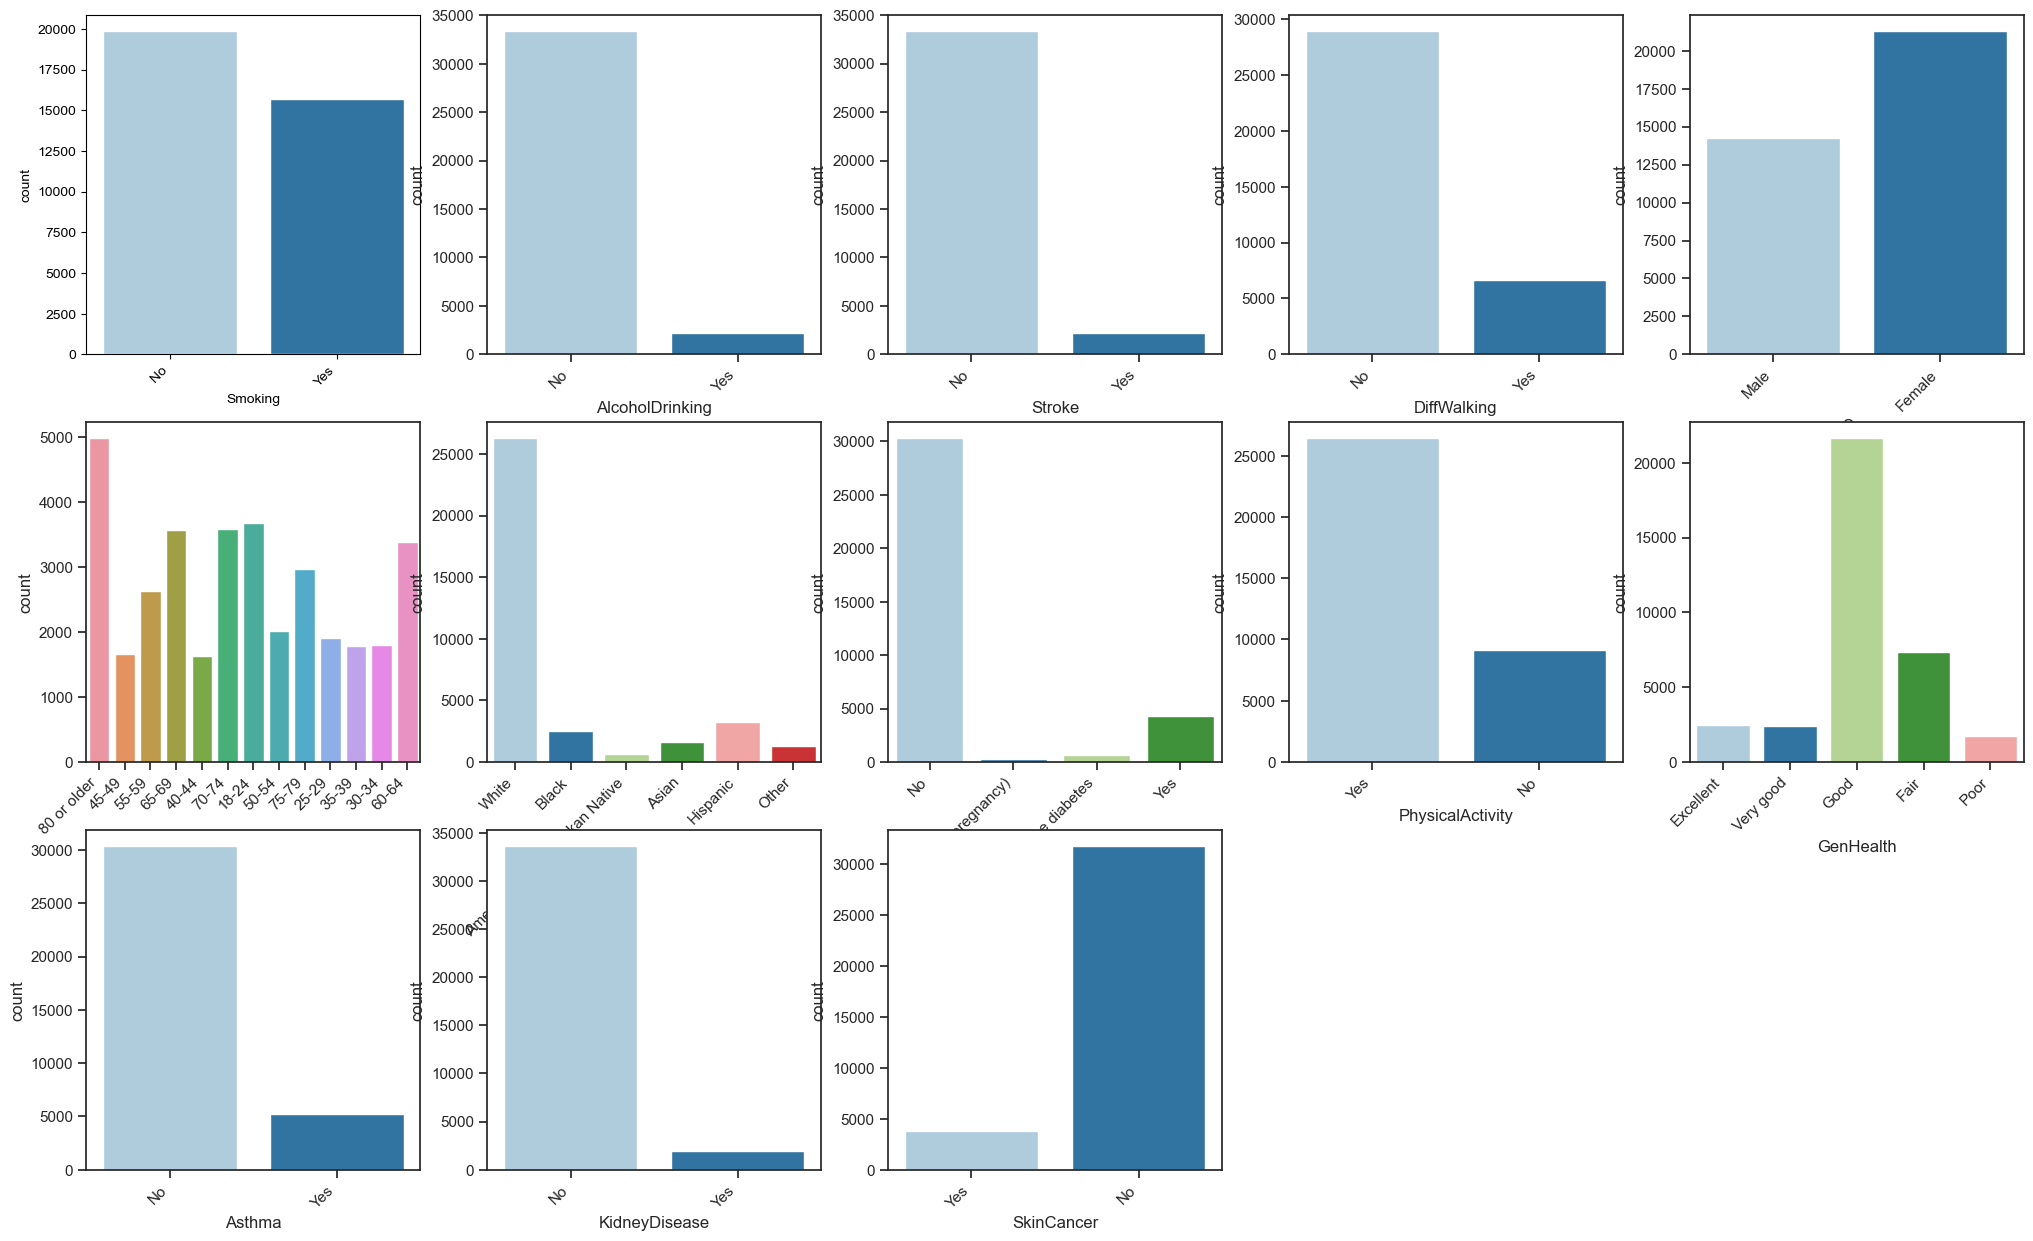

In [5]:
plt.figure(figsize = (25,15))
for i, feature in enumerate(categorical_features):
      plt.subplot(3,5,i + 1)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df)#, hue = 'Stroke')#, color='#221C35')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


Convert Age into a numarical feature 

In [6]:
df['AgeCategory'].unique()

array(['80 or older', '45-49', '55-59', '65-69', '40-44', '70-74',
       '18-24', '50-54', '75-79', '25-29', '35-39', '30-34', '60-64'],
      dtype=object)

In [7]:
df.loc[df['AgeCategory'] == '80 or older', 'AgeCategory'] = "80-100"

In [8]:
df['AgeCategory'].unique()

array(['80-100', '45-49', '55-59', '65-69', '40-44', '70-74', '18-24',
       '50-54', '75-79', '25-29', '35-39', '30-34', '60-64'], dtype=object)

In [9]:
import random

def generate_random_age(AgeCategory):
    lower_bound, upper_bound = map(int, AgeCategory.split('-'))
    return random.randint(lower_bound, upper_bound)


df['AgeCategory'] = df['AgeCategory'].apply(generate_random_age)

df.rename(columns={'AgeCategory': 'age'}, inplace=True)

In [10]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,age,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Low,18.13,No,No,No,0.0,0.0,No,Male,85,White,No,Yes,Excellent,8.0,No,No,Yes
1,Low,19.49,No,No,No,0.0,0.0,No,Female,46,White,No,Yes,Excellent,7.0,Yes,No,No
2,Low,19.74,No,No,No,0.0,1.0,No,Female,58,White,No,Yes,Excellent,8.0,No,No,No
3,Low,19.85,No,No,No,0.0,0.0,No,Female,83,White,No,Yes,Excellent,7.0,No,No,No
4,Low,17.63,No,No,No,0.0,0.0,No,Female,68,White,No,Yes,Very good,7.0,No,No,No


Vizualize the data distributions of numarical features

Text(0.5, 1.0, 'Histogram of Age')

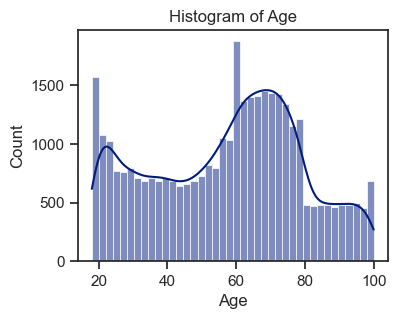

In [11]:
plt.figure(figsize=(4, 3)) 
sns.set(palette='dark')
sns.set_style("ticks")
sns.histplot(df['age'],kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of BMI')

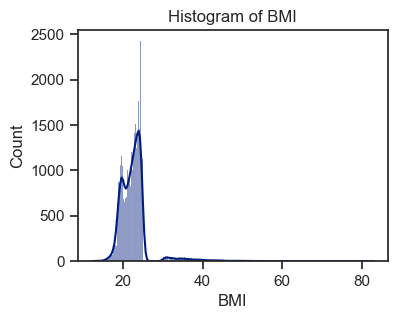

In [12]:
plt.figure(figsize=(4, 3)) 
sns.set(palette='dark')
sns.set_style("ticks")
sns.histplot(df['BMI'],kde=True)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title('Histogram of BMI')

(0.0, 5000.0)

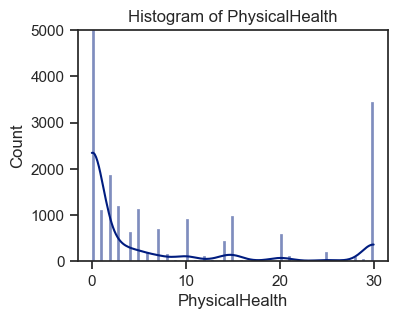

In [13]:
plt.figure(figsize=(4, 3)) 
sns.set(palette='dark')
sns.set_style("ticks")
sns.histplot(df['PhysicalHealth'],kde=True)
plt.xlabel("PhysicalHealth")
plt.ylabel("Count")
plt.title('Histogram of PhysicalHealth')
plt.ylim(0, 5000) 

(0.0, 5000.0)

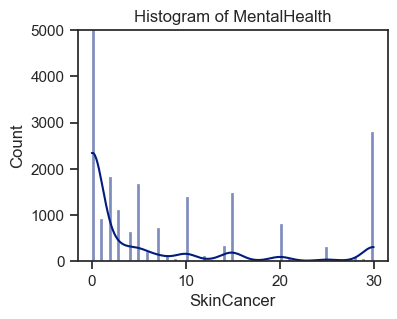

In [14]:
plt.figure(figsize=(4, 3)) 
sns.set(palette='dark')
sns.set_style("ticks")
sns.histplot(df['MentalHealth'],kde=True)
plt.xlabel(feature)
plt.ylabel("Count")
plt.title('Histogram of MentalHealth')
plt.ylim(0, 5000) 

(0.0, 5000.0)

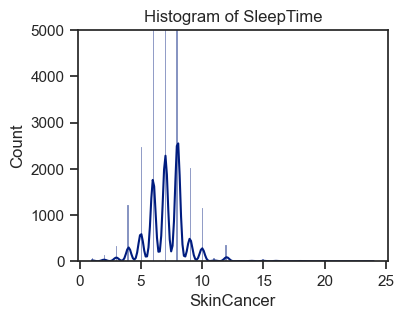

In [15]:
plt.figure(figsize=(4, 3)) 
sns.set(palette='dark')
sns.set_style("ticks")
sns.histplot(df['SleepTime'],kde=True)
plt.xlabel(feature)
plt.ylabel("Count")
plt.title('Histogram of SleepTime')
plt.ylim(0, 5000) 

Visualize the class variable

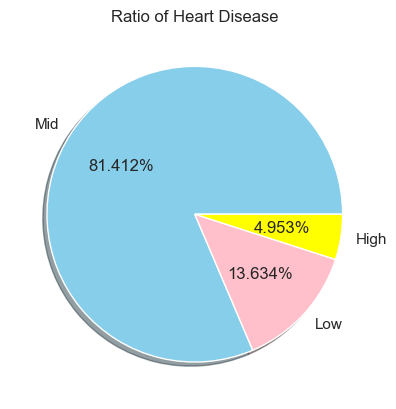

In [16]:
plt.pie(x = df['HeartDisease'].value_counts() ,autopct='%1.3f%%',labels= df['HeartDisease'].value_counts().index, colors=['skyblue', 'pink','yellow'], shadow=True)
plt.title('Ratio of Heart Disease')
plt.show()

Check null values 

In [17]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
age                 0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Drop unwanted columns

In [18]:
df = df.drop(['Race','SkinCancer'], axis = 1)

Label encoding

In [19]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
age                   int64
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
dtype: object

In [20]:
# from sklearn.preprocessing import LabelEncoder

# label = LabelEncoder()
# df['HeartDisease'] = label.fit_transform(df['HeartDisease'])
# df['Smoking'] = label.fit_transform(df['Smoking'])
# df['AlcoholDrinking'] = label.fit_transform(df['AlcoholDrinking'])
# df['Stroke'] = label.fit_transform(df['Stroke'])
# df['DiffWalking'] = label.fit_transform(df['DiffWalking'])
# df['Sex'] = label.fit_transform(df['Sex'])
# df['Diabetic'] = label.fit_transform(df['Diabetic'])
# df['PhysicalActivity'] = label.fit_transform(df['PhysicalActivity'])
# df['GenHealth'] = label.fit_transform(df['GenHealth'])
# df['Asthma'] = label.fit_transform(df['Asthma'])
# df['KidneyDisease'] = label.fit_transform(df['KidneyDisease'])

In [21]:
from sklearn.preprocessing import LabelEncoder 

label_encoders = {
    'HeartDisease': LabelEncoder(),
    'Smoking': LabelEncoder(),
    'AlcoholDrinking': LabelEncoder(),
    'Stroke': LabelEncoder(),
    'DiffWalking': LabelEncoder(),
    'Sex': LabelEncoder(),
    'Diabetic': LabelEncoder(),
    'PhysicalActivity': LabelEncoder(),
    'GenHealth': LabelEncoder(),
    'Asthma': LabelEncoder(),
    'KidneyDisease': LabelEncoder()
}

for column, encoder in label_encoders.items():
    df[column] = encoder.fit_transform(df[column])


In [22]:
df.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
age                   int64
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
dtype: object

In [23]:
import pickle

with open('HeartRisk-label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

In [24]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,age,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,1,18.13,0,0,0,0.0,0.0,0,1,85,0,1,0,8.0,0,0
1,1,19.49,0,0,0,0.0,0.0,0,0,46,0,1,0,7.0,1,0
2,1,19.74,0,0,0,0.0,1.0,0,0,58,0,1,0,8.0,0,0
3,1,19.85,0,0,0,0.0,0.0,0,0,83,0,1,0,7.0,0,0
4,1,17.63,0,0,0,0.0,0.0,0,0,68,0,1,4,7.0,0,0


Apply Scaling to the dataset

In [25]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

columns_to_scale = ['BMI','PhysicalHealth','MentalHealth','age','SleepTime']

df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [26]:
with open('scaler-HeartRisk.pkl', 'wb') as scaler_file:
    pickle.dump(standardScaler, scaler_file)

In [27]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,age,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,1,-1.082332,0,0,0,-0.542964,-0.570474,0,1,1.271115,0,1,0,0.558541,0,0
1,1,-0.760536,0,0,0,-0.542964,-0.570474,0,0,-0.513953,0,1,0,-0.060316,1,0
2,1,-0.701382,0,0,0,-0.542964,-0.460839,0,0,0.035298,0,1,0,0.558541,0,0
3,1,-0.675354,0,0,0,-0.542964,-0.570474,0,0,1.179573,0,1,0,-0.060316,0,0
4,1,-1.200640,0,0,0,-0.542964,-0.570474,0,0,0.493008,0,1,4,-0.060316,0,0


Remove the class imbalance

In [28]:
unique_counts = df["HeartDisease"].value_counts()
print("Unique counts of HeartDisease")
print(unique_counts)

Unique counts of HeartDisease
2    28960
1     4850
0     1762
Name: HeartDisease, dtype: int64


In [29]:
class_0 = df[df['HeartDisease'] == 0] # high
class_1 = df[df['HeartDisease'] == 1] # low
class_2 = df[df['HeartDisease'] == 2] # mid

class_0_sampled = class_0.sample(n=1762, random_state=42)
class_1_sampled = class_1.sample(n=1762, random_state=42)
class_2_sampled = class_2.sample(n=1762, random_state=42)

balanced_df = pd.concat([class_0_sampled, class_1_sampled,class_2_sampled])


new_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [30]:
unique_counts = new_df["HeartDisease"].value_counts()
print("Unique counts of HeartDisease")
print(unique_counts)

Unique counts of HeartDisease
1    1762
0    1762
2    1762
Name: HeartDisease, dtype: int64


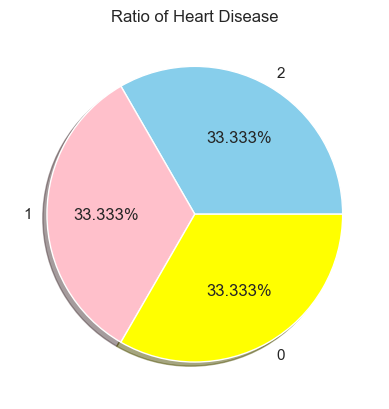

In [31]:
plt.pie(x = new_df['HeartDisease'].value_counts() ,autopct='%1.3f%%' ,labels= df['HeartDisease'].value_counts().index, colors=['skyblue', 'pink','yellow'], shadow=True)
plt.title('Ratio of Heart Disease')
plt.show()

Check the correlation table and correlation Matrix

In [32]:
correlation_table = df.corr()
correlation_table

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,age,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
HeartDisease,1.000000,-0.419490,0.148077,0.090411,-0.106593,-0.245449,-0.080437,-0.181290,0.031643,0.074351,-0.174254,0.037172,-0.288307,0.005143,-0.072978,-0.124942
BMI,-0.419490,1.000000,0.167719,0.009718,0.171232,0.393512,0.149764,0.354115,0.098886,0.142714,0.313742,-0.250669,0.215131,-0.037756,0.130595,0.199907
Smoking,0.148077,0.167719,1.000000,0.161292,0.089991,0.167611,0.115785,0.172384,0.147801,0.143149,0.061385,-0.159184,-0.043413,-0.049307,0.059596,0.041320
AlcoholDrinking,0.090411,0.009718,0.161292,1.000000,-0.016248,0.000851,0.073280,-0.017992,0.039004,-0.059829,-0.051968,-0.004706,-0.016485,-0.016797,0.013264,-0.023604
Stroke,-0.106593,0.171232,0.089991,-0.016248,1.000000,0.163201,0.042591,0.202914,0.016694,0.156093,0.119709,-0.098802,0.012659,0.016687,0.047239,0.093272
PhysicalHealth,-0.245449,0.393512,0.167611,0.000851,0.163201,1.000000,0.282487,0.422880,0.011835,0.119821,0.186316,-0.244676,-0.006959,-0.060970,0.122131,0.154775
MentalHealth,-0.080437,0.149764,0.115785,0.073280,0.042591,0.282487,1.000000,0.125884,-0.043397,-0.185057,0.024794,-0.081315,0.011133,-0.134816,0.118853,0.027701
DiffWalking,-0.181290,0.354115,0.172384,-0.017992,0.202914,0.422880,0.125884,1.000000,-0.007215,0.257305,0.210916,-0.290203,-0.006730,-0.018466,0.094994,0.164301
Sex,0.031643,0.098886,0.147801,0.039004,0.016694,0.011835,-0.043397,-0.007215,1.000000,-0.081396,0.026503,-0.015061,0.020545,-0.009444,-0.035880,0.010166
age,0.074351,0.142714,0.143149,-0.059829,0.156093,0.119821,-0.185057,0.257305,-0.081396,1.000000,0.184986,-0.145469,-0.027001,0.092199,-0.071987,0.121519


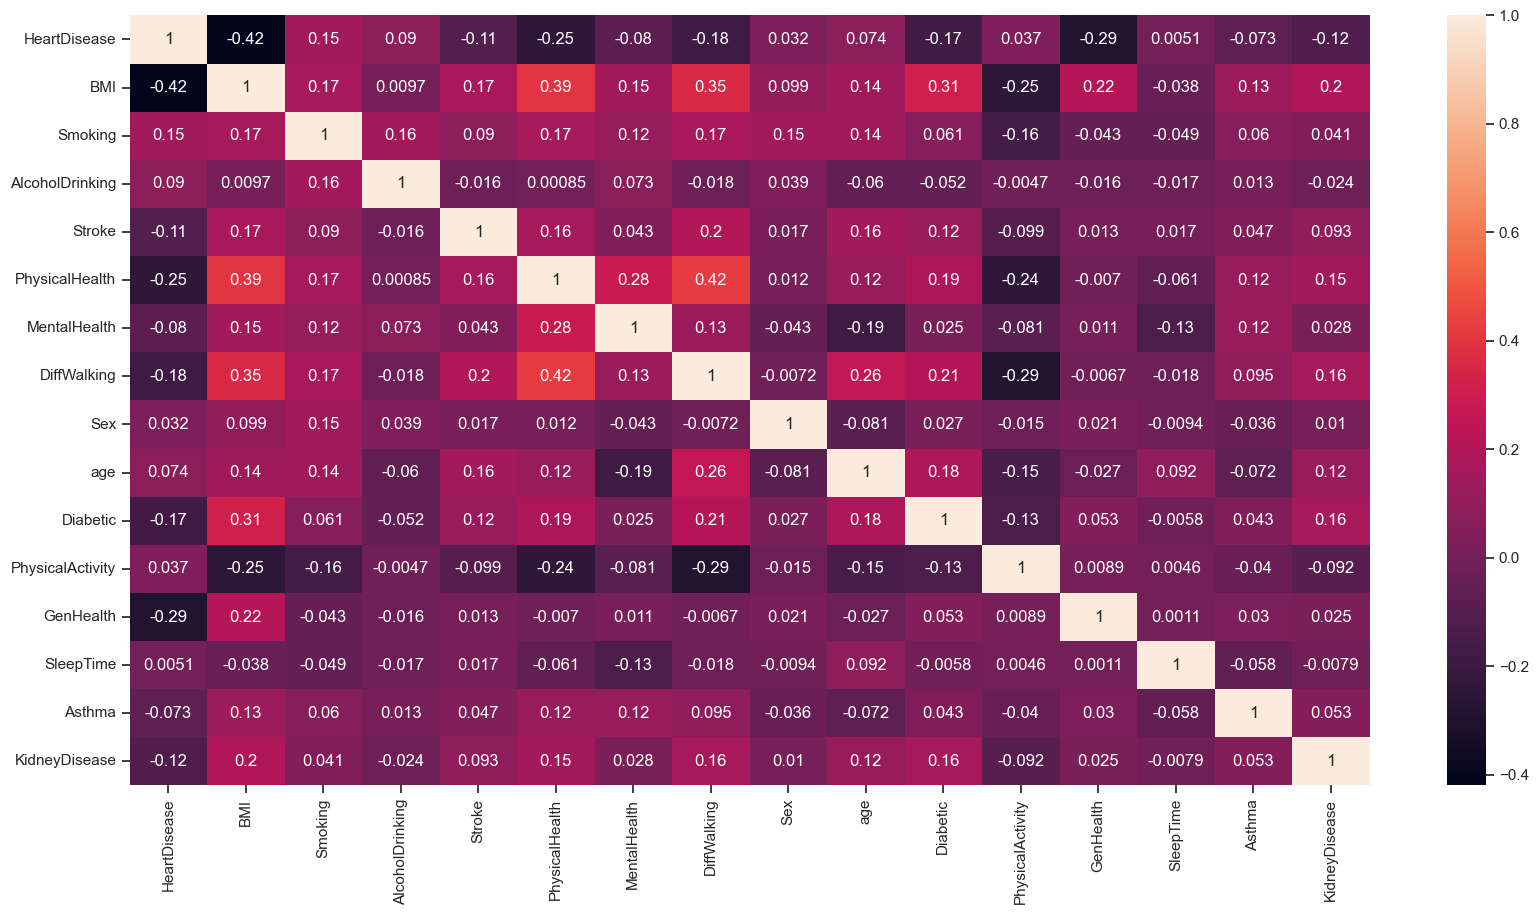

In [33]:
plt.figure(figsize = (20,10))
corrMatrix=df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Divide the dataset into data and target

In [34]:
x = new_df.drop(columns=['HeartDisease']) 
y = new_df['HeartDisease']

data=x.values
target=y.values

Splite the data and target into training and testing

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [36]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix

DecisionTree Classifier

Testing Data-----------

The accuracy score of DecisionTreeClassifier is 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       414
           1       1.00      1.00      1.00       448
           2       1.00      1.00      1.00       460

    accuracy                           1.00      1322
   macro avg       1.00      1.00      1.00      1322
weighted avg       1.00      1.00      1.00      1322



Confusion Matrix:


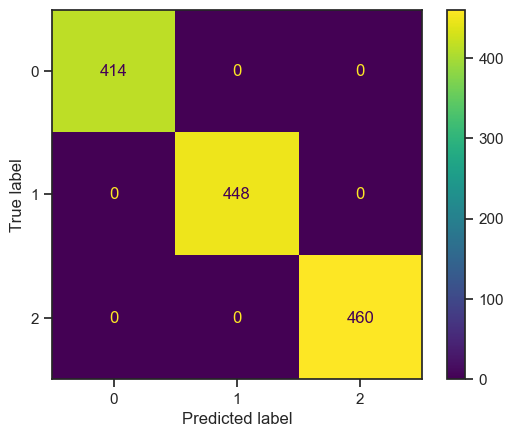

In [37]:
from sklearn.tree import DecisionTreeClassifier

dts = DecisionTreeClassifier()
dts.fit(X_train, y_train)

y_pred_dts = dts.predict(X_test)

#y_train_pred__dts = dts.predict(X_train)

print("Testing Data-----------")
print()
print("The accuracy score of DecisionTreeClassifier is {}".format(accuracy_score(y_test, y_pred_dts)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_dts))
print()
#print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred_dts)))
print()

c_matrix = confusion_matrix(y_test, y_pred_dts)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()
print()

# print("Training Data-------")
# print()
# print("The accuracy score of DecisionTreeClassifier is {}".format(accuracy_score(y_train, y_train_pred__dts)))
# print()
# print("Classification Report:")
# print(classification_report(y_train, y_train_pred__dts))
# print()
# print("The AUC-ROC score is {}".format(roc_auc_score(y_train, y_train_pred__dts)))

RandomForest Classifier

The accuracy score of Random Forest Classifier is 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       414
           1       1.00      1.00      1.00       448
           2       1.00      1.00      1.00       460

    accuracy                           1.00      1322
   macro avg       1.00      1.00      1.00      1322
weighted avg       1.00      1.00      1.00      1322



Confusion Matrix:


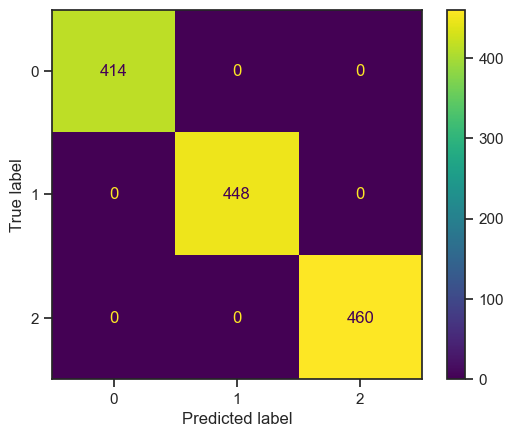

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(y_test, y_pred_rfc)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))
print()
#print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred_rfc)))
print()

c_matrix = confusion_matrix(y_test, y_pred_rfc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()
print()

GradientBoosting Classifier

The accuracy score of GradientBoosting Classifier is 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       414
           1       1.00      1.00      1.00       448
           2       1.00      1.00      1.00       460

    accuracy                           1.00      1322
   macro avg       1.00      1.00      1.00      1322
weighted avg       1.00      1.00      1.00      1322



Confusion Matrix:


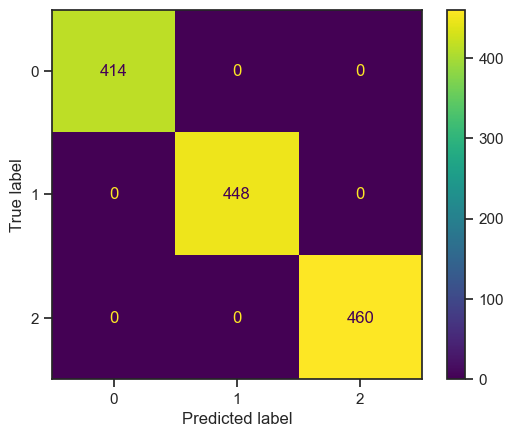

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

print("The accuracy score of GradientBoosting Classifier is {}".format(accuracy_score(y_test, y_pred_gbc)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc))
print()
#print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred_gbc)))
print()

c_matrix = confusion_matrix(y_test, y_pred_gbc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()
print()

KNeighbors Classifier

The accuracy score of KNeighbors Classifier is 0.9962178517397882

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       414
           1       0.99      1.00      0.99       448
           2       1.00      0.99      0.99       460

    accuracy                           1.00      1322
   macro avg       1.00      1.00      1.00      1322
weighted avg       1.00      1.00      1.00      1322



Confusion Matrix:


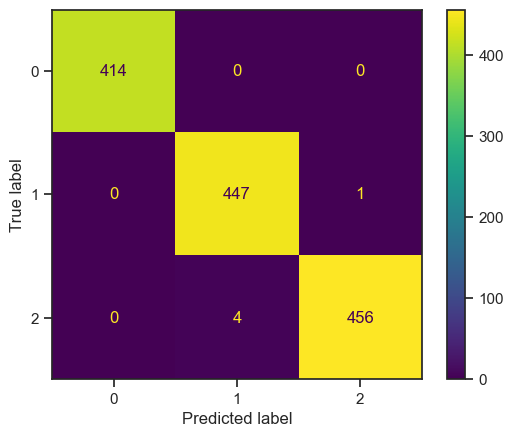

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("The accuracy score of KNeighbors Classifier is {}".format(accuracy_score(y_test, y_pred_knn)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print()
#print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred_knn)))
print()

c_matrix = confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()
print()

In [41]:
pickle.dump(gbc,open('HeartRisk-Model.pkl','wb'))

Testing Results

In [42]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gbc})
result

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,2,2
...,...,...
1317,2,2
1318,2,2
1319,0,0
1320,1,1


In [43]:
test_data=[[-1.844750,1,0,0,-0.046751,3.281069,0,0,0.204200,2,1,4,-1.460354,1,0]]

test_data=np.array(test_data)

result=gbc.predict(test_data)
print(result)

[1]


Testing for backend

In [44]:
BMI = 16.60
Smoking = 'Yes'
AlcoholDrinking = 'No'
Stroke = 'No'
PhysicalHealth = 3.0
MentalHealth = 30.0
DiffWalking = 'No'
Sex = 'Female'
age = 55
Diabetic = 'Yes'
PhysicalActivity = 'Yes'
GenHealth = 'Very good'
SleepTime = 5.0
Asthma = 'No'
KidneyDisease = 'Yes'

In [45]:
data = [[BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,age,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease]]
df_heartRisk = pd.DataFrame(data,  columns = [
    'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 
    'MentalHealth', 'DiffWalking', 'Sex', 'age', 'Diabetic', 
    'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease'
])

In [46]:
df_heartRisk

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,age,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,16.6,Yes,No,No,3.0,30.0,No,Female,55,Yes,Yes,Very good,5.0,No,Yes


In [47]:
scaler_HeartRisk=pickle.load(open('scaler-HeartRisk.pkl','rb'))

columns_to_scale = ['BMI','PhysicalHealth','MentalHealth','age','SleepTime']

df_heartRisk[columns_to_scale] = scaler_HeartRisk.transform(df_heartRisk[columns_to_scale])

In [48]:
HeartRisk_label_encoders=pickle.load(open('HeartRisk-label_encoders.pkl','rb'))

for column, encoder in HeartRisk_label_encoders.items():
    if column in df_heartRisk.columns:
	    df_heartRisk[column] = encoder.transform(df_heartRisk[column])
				


In [49]:
df_heartRisk

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,age,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,-1.444354,1,0,0,-0.228421,2.718578,0,0,-0.102014,2,1,4,-1.298031,0,1


In [50]:
HeartRisk_Model=pickle.load(open('HeartRisk-Model.pkl','rb'))

y_pred_new = HeartRisk_Model.predict(X_test)

result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_new})
result

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,2,2
...,...,...
1317,2,2
1318,2,2
1319,0,0
1320,1,1
